# **Análise de Séries Temporais p/ Engenharia de Software (Prática em Docência - Mestrado)**

## 1. **Introdução às Séries Temporais**

   * O que são séries temporais
   * Aplicações clássicas (engenharia, finanças, agronegócio, sistemas, etc.)
   * Tipos de frequência: diária, mensal, anual, etc.


### 📌 O que são Séries Temporais?

Uma **série temporal** é uma sequência de observações numéricas coletadas ao longo do tempo — geralmente em intervalos regulares (diários, mensais, anuais etc.).

Diferente de dados comuns (cross-section), séries temporais **levam em consideração a dependência temporal**, ou seja, os dados de hoje influenciam os de amanhã.

> Exemplo: Temperatura média diária de uma cidade ao longo de um ano.




### 📈 Representação gráfica típica:

- Eixo X: Tempo
- Eixo Y: Valor observado

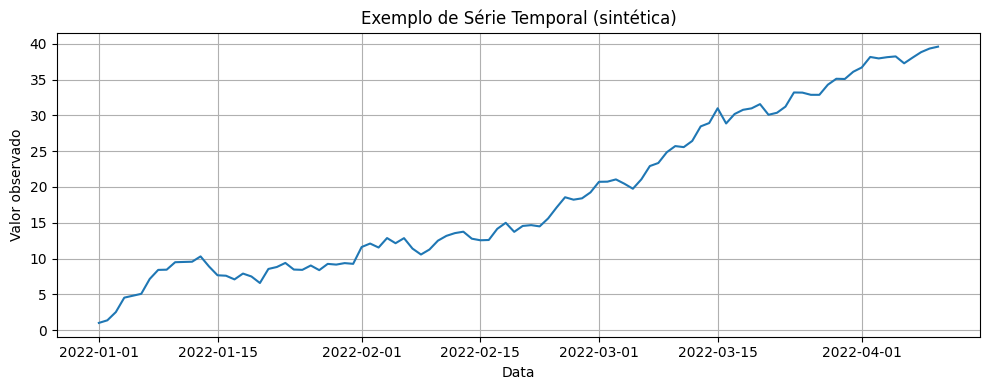

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gerar uma série temporal sintética simples
np.random.seed(42)
datas = pd.date_range(start="2022-01-01", periods=100, freq="D")
valores = np.cumsum(np.random.normal(loc=0.5, scale=1, size=100))

serie_temporal = pd.Series(data=valores, index=datas)

# Plotar
plt.figure(figsize=(10, 4))
plt.plot(serie_temporal)
plt.title("Exemplo de Série Temporal (sintética)")
plt.xlabel("Data")
plt.ylabel("Valor observado")
plt.grid(True)
plt.tight_layout()
plt.show()


### 💼 Aplicações Clássicas de Séries Temporais

As séries temporais são amplamente utilizadas em diversos campos, como:

- **Engenharia**: Monitoramento de sensores, falhas em equipamentos
- **Finanças**: Preços de ações, inflação, câmbio
- **Agronegócio**: Produção agrícola, previsão de safra, clima
- **Sistemas / TI**: Logs de acesso, tráfego de rede, uso de CPU
- **Economia**: PIB, taxa de juros, desemprego, consumo

Essas áreas usam séries temporais tanto para **análise de comportamento** quanto para **previsões futuras**.

> Exemplo real: Previsão do consumo elétrico para planejar geração de energia.

### 📅 Tipos de Frequência Temporal

A frequência de uma série temporal se refere ao intervalo entre os pontos de dados. Os tipos mais comuns são:

- **Diária**: dados de cada dia (ex: preço diário do dólar)
- **Mensal**: dados mensais (ex: inflação)
- **Anual**: dados por ano (ex: crescimento populacional)
- **Horária / Minutal**: muito usada em IoT, sistemas e sensores

In [2]:
print("📆 Exemplo de datas com frequências diferentes:\n")

print("Diária:")
print(pd.date_range(start='2023-01-01', periods=5, freq='D'))

print("\nMensal:")
print(pd.date_range(start='2023-01-01', periods=5, freq='M'))

print("\nAnual:")
print(pd.date_range(start='2020-01-01', periods=5, freq='Y'))


📆 Exemplo de datas com frequências diferentes:

Diária:
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05'],
              dtype='datetime64[ns]', freq='D')

Mensal:
DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31'],
              dtype='datetime64[ns]', freq='ME')

Anual:
DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')


/tmp/ipython-input-2573760490.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  print(pd.date_range(start='2023-01-01', periods=5, freq='M'))
/tmp/ipython-input-2573760490.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  print(pd.date_range(start='2020-01-01', periods=5, freq='Y'))


## 2. **Componentes de uma Série Temporal**



Uma série temporal pode ser decomposta em **componentes estruturais** que ajudam a entender seu comportamento ao longo do tempo:

### 🔹 1. Tendência (Trend)
É a direção geral do movimento dos dados ao longo do tempo, geralmente de longo prazo.

> Exemplo: crescimento contínuo na temperatura global ao longo das décadas.


### 🔸 2. Sazonalidade (Seasonality)
Variações sistemáticas e periódicas que se repetem em intervalos fixos de tempo (como por ano, por mês ou por semana).

> Exemplo: aumento nas vendas de sorvete no verão, ou aumento de acessos em um sistema aos domingos.


### 🔻 3. Ciclo (Cycle)
Oscilações de longo prazo, geralmente associadas a fatores econômicos ou comportamentais. Diferente da sazonalidade, os ciclos **não têm uma periodicidade fixa**.

> Exemplo: ciclos econômicos de crescimento e recessão.


### ⚪ 4. Ruído (Resíduo ou Irregularidade)
Flutuações aleatórias que não podem ser explicadas por nenhum dos outros componentes.

> Exemplo: uma queda inesperada nas vendas devido a um problema logístico.


### 📊 Decomposição de Séries Temporais

Podemos decompor uma série temporal em seus componentes com dois modelos principais:

- **Modelo Aditivo**:  
  $$ Y_t = T_t + S_t + R_t $$
- **Modelo Multiplicativo**:  
  $$ Y_t = T_t \times S_t \times R_t $$

A escolha depende do comportamento da sazonalidade:
- Se a **amplitude sazonal é constante** → modelo **aditivo**
- Se a **amplitude sazonal cresce com a tendência** → modelo **multiplicativo**


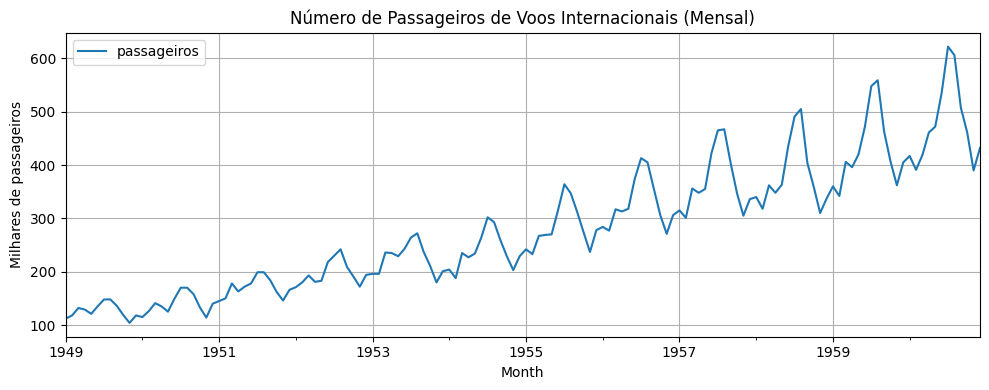

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Carregar dados reais: número de passageiros mensais em voos (1949-1960)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.columns = ['passageiros']

# Visualizar a série original
df.plot(figsize=(10, 4), title='Número de Passageiros de Voos Internacionais (Mensal)')
plt.ylabel('Milhares de passageiros')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3936352410.py:5: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


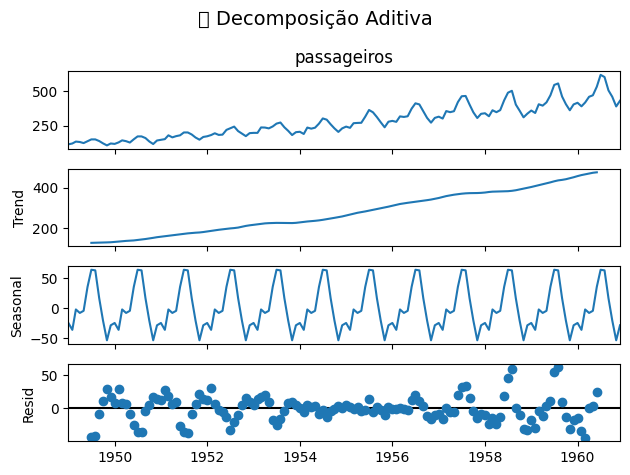

In [4]:
# Decomposição Aditiva
decomp_ad = seasonal_decompose(df['passageiros'], model='additive', period=12)
decomp_ad.plot()
plt.suptitle("📉 Decomposição Aditiva", fontsize=14)
plt.tight_layout()
plt.show()


/tmp/ipython-input-704341413.py:5: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


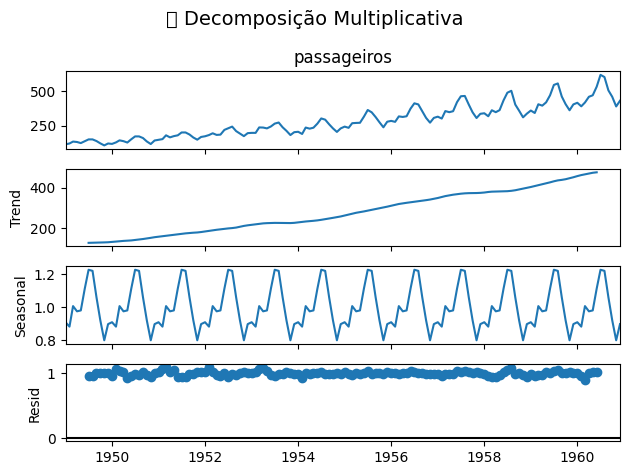

In [5]:
# Decomposição Multiplicativa
decomp_mul = seasonal_decompose(df['passageiros'], model='multiplicative', period=12)
decomp_mul.plot()
plt.suptitle("📉 Decomposição Multiplicativa", fontsize=14)
plt.tight_layout()
plt.show()


### 🧠 Interpretação dos Gráficos

- **Observed**: Série temporal original
- **Trend**: Componente de tendência estimada
- **Seasonal**: Padrão sazonal identificado
- **Residual**: O que sobra (ruído) após a remoção da tendência e sazonalidade


### 💡 Importante:
Sempre **visualize e decomponha** a série antes de modelar. Isso ajuda a decidir se a série precisa ser diferenciada, normalizada ou se requer modelagem sazonal (SARIMA, por exemplo).




## 3. **Pré-processamento de Séries Temporais**



Antes de analisar ou modelar uma série temporal, é fundamental realizar o **pré-processamento dos dados**, garantindo que a estrutura esteja adequada para os métodos estatísticos e de machine learning.

### 📆 3.1. Tratamento de Datas e Indexação Temporal

O primeiro passo é garantir que a variável de tempo (data) esteja corretamente **parseada como `datetime`** e **definida como índice do DataFrame**.



In [1]:
import pandas as pd

# Exemplo simples com datas
dados = {
    'data': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'valor': [10, 15, 20]
}

df = pd.DataFrame(dados)

# Converter coluna de datas
df['data'] = pd.to_datetime(df['data'])

# Definir como índice
df.set_index('data', inplace=True)

print(df)


            valor
data             
2023-01-01     10
2023-01-02     15
2023-01-03     20


**🧠 Por que isso importa?**  
Muitos métodos de séries temporais (como `resample`, `rolling`, `seasonal_decompose`) exigem um índice datetime ordenado.


### ❓ 3.2. Tratamento de Dados Faltantes

Séries temporais podem ter datas ausentes ou valores faltantes por falhas na coleta ou registros ausentes. Existem várias estratégias para lidar com isso:

- Preencher com valor anterior: `.ffill()`
- Preencher com valor seguinte: `.bfill()`
- Interpolação linear: `.interpolate()`
- Remoção de linhas: `.dropna()`



In [2]:
# Simular valores ausentes
df_missing = df.copy()
df_missing.loc['2023-01-02', 'valor'] = None
print("🔍 Série com valor ausente:\n", df_missing)

# Preencher com interpolação
df_filled = df_missing.interpolate()
print("\n✅ Após interpolação:\n", df_filled)


🔍 Série com valor ausente:
             valor
data             
2023-01-01   10.0
2023-01-02    NaN
2023-01-03   20.0

✅ Após interpolação:
             valor
data             
2023-01-01   10.0
2023-01-02   15.0
2023-01-03   20.0



### ⚖️ 3.3. Normalização e Padronização

Alguns modelos, especialmente os baseados em aprendizado de máquina, funcionam melhor com dados **normalizados** ou **padronizados**.



#### 🔹 Normalização (Min-Max)

Transforma os dados para o intervalo [0, 1]:

$$
x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

#### 🔸 Padronização (Z-score)

Transforma os dados com média 0 e desvio padrão 1:

$$
x_{pad} = \frac{x - \mu}{\sigma}
$$

Onde:

* **$x$**: o valor original da sua série.
* **$\mu$**: **a média** da série.
* **$\sigma$**: **o desvio padrão** da série.

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Gerar uma série maior para exemplo
import numpy as np
datas = pd.date_range(start="2023-01-01", periods=10, freq="D")
valores = np.random.randint(50, 150, size=10)
df_valores = pd.DataFrame({'valor': valores}, index=datas)

# MinMaxScaler
scaler_minmax = MinMaxScaler()
df_valores['minmax'] = scaler_minmax.fit_transform(df_valores[['valor']])

# StandardScaler (Z-score)
scaler_z = StandardScaler()
df_valores['zscore'] = scaler_z.fit_transform(df_valores[['valor']])

df_valores


,valor,minmax,zscore
2023-01-01,146,1.000000,1.537249
2023-01-02,97,0.484211,0.027726
2023-01-03,51,0.000000,-1.389377
2023-01-04,103,0.547368,0.212565
2023-01-05,69,0.189474,-0.834858
2023-01-06,72,0.221053,-0.742439
2023-01-07,52,0.010526,-1.358570
2023-01-08,107,0.589474,0.335792
2023-01-09,130,0.831579,1.044343
2023-01-10,134,0.873684,1.167570


#### 💡 Quando aplicar?

| Etapa                         | Quando aplicar? |
|------------------------------|-----------------|
| **Interpolação**             | Falhas pontuais na coleta de dados |
| **MinMaxScaler**             | Modelos de ML (ex: LSTM, redes neurais) |
| **Z-score (StandardScaler)** | Modelos estatísticos e ML |
| **Indexação temporal**       | SEMPRE — é base para qualquer análise de séries temporais |

---

➡️ **Próximo passo:** Estacionaridade — entender se a série precisa ser transformada antes de modelar.


## 4. **Estacionaridade**


### 📌 O que é Estacionaridade?

Uma série temporal é **estacionária** quando suas **propriedades estatísticas não mudam ao longo do tempo**, ou seja:

- Média constante
- Variância constante
- Estrutura de autocorrelação constante

> Em outras palavras: o comportamento da série hoje é o mesmo daqui a um ano.

### 🎯 Por que é importante?

A maior parte dos modelos clássicos de séries temporais (AR, MA, ARMA, ARIMA) **pressupõe que a série seja estacionária**.

Se a série **não for estacionária**, os parâmetros do modelo deixam de ser confiáveis, e as previsões tendem a ser incorretas.


### 👀 Visualmente, séries não estacionárias costumam ter:

- Tendência de crescimento ou queda
- Sazonalidade
- Variação crescente com o tempo (heterocedasticidade)


/tmp/ipython-input-70073053.py:17: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


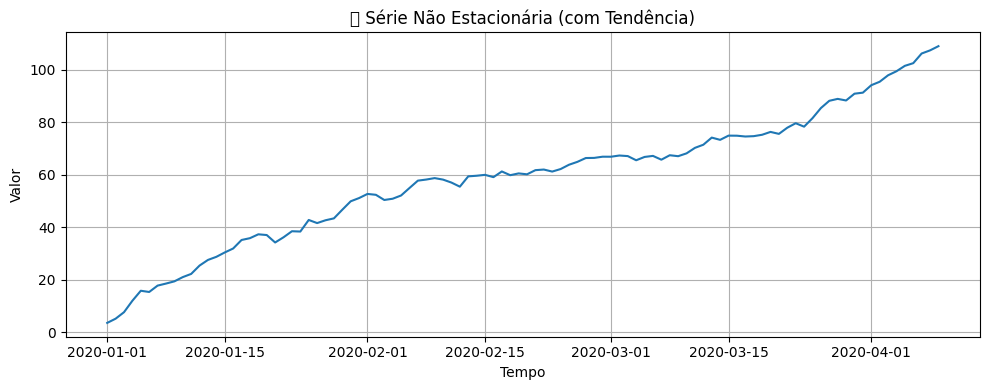

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Série com tendência crescente (não estacionária)
np.random.seed(0)
t = pd.date_range(start='2020-01-01', periods=100, freq='D')
serie_nao_estacionaria = pd.Series(np.cumsum(np.random.normal(loc=1.0, scale=1.5, size=100)), index=t)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(serie_nao_estacionaria)
plt.title("📉 Série Não Estacionária (com Tendência)")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.grid(True)
plt.tight_layout()
plt.show()


### 🧪 Testes de Estacionaridade

Os dois testes mais clássicos:

#### 1. **ADF – Augmented Dickey-Fuller**
- **H₀ (hipótese nula)**: a série **não é estacionária**
- **H₁ (alternativa)**: a série é estacionária

🔽 Se o **p-valor < 0.05**, rejeitamos H₀ ⇒ **série estacionária**


#### 2. **KPSS – Kwiatkowski-Phillips-Schmidt-Shin**
- **H₀**: a série **é estacionária**
- **H₁**: a série não é estacionária

🔼 Se o **p-valor < 0.05**, rejeitamos H₀ ⇒ **série não estacionária**

> ⚠️ Por isso é importante usar **os dois testes juntos**: eles se complementam.

In [5]:
from statsmodels.tsa.stattools import adfuller, kpss

def testar_estacionaridade(serie):
    print("🔎 Teste de Dickey-Fuller (ADF):")
    resultado_adf = adfuller(serie)
    print(f"  → p-valor ADF: {resultado_adf[1]:.4f}")
    if resultado_adf[1] < 0.05:
        print("  ✅ Série estacionária (ADF)")
    else:
        print("  ❌ Série não estacionária (ADF)")

    print("\n🔎 Teste de KPSS:")
    resultado_kpss = kpss(serie, regression='c')
    print(f"  → p-valor KPSS: {resultado_kpss[1]:.4f}")
    if resultado_kpss[1] < 0.05:
        print("  ❌ Série não estacionária (KPSS)")
    else:
        print("  ✅ Série estacionária (KPSS)")

# Aplicar os testes na série com tendência
testar_estacionaridade(serie_nao_estacionaria)


🔎 Teste de Dickey-Fuller (ADF):
  → p-valor ADF: 0.7371
  ❌ Série não estacionária (ADF)

🔎 Teste de KPSS:
  → p-valor KPSS: 0.0100
  ❌ Série não estacionária (KPSS)


/tmp/ipython-input-1092486966.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado_kpss = kpss(serie, regression='c')



### 🔧 Transformações para Estacionarizar Séries

Se os testes indicarem que a série **não é estacionária**, podemos aplicar algumas transformações para **tornar a série estacionária**.


#### 1. 📉 **Diferenciação** (d)

Subtrai o valor atual pelo anterior:  
$$ y'_t = y_t - y_{t-1} $$

É o **"d"** no modelo **ARIMA(p, d, q)**

/tmp/ipython-input-686223649.py:8: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


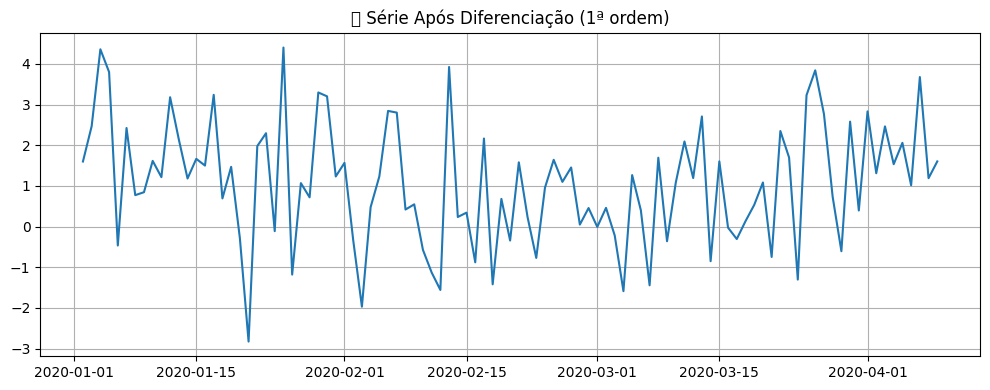

🔎 Teste de Dickey-Fuller (ADF):
  → p-valor ADF: 0.0000
  ✅ Série estacionária (ADF)

🔎 Teste de KPSS:
  → p-valor KPSS: 0.1000
  ✅ Série estacionária (KPSS)


/tmp/ipython-input-1092486966.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado_kpss = kpss(serie, regression='c')


In [6]:
# Diferenciação
serie_diff = serie_nao_estacionaria.diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(serie_diff)
plt.title("📉 Série Após Diferenciação (1ª ordem)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Testar estacionaridade novamente
testar_estacionaridade(serie_diff)


### 2. 🔒 **Logaritmo**

Boa para séries com crescimento exponencial.

$y'_t = \log(y_t)$

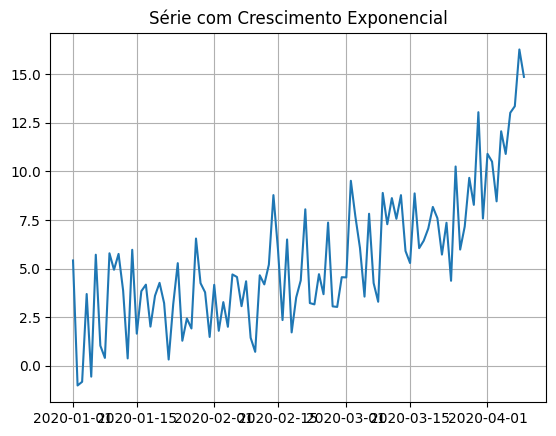

In [7]:
# Simulando crescimento exponencial
serie_exp = pd.Series(np.exp(np.linspace(0.5, 2.5, 100)) + np.random.normal(0, 2, 100), index=t)

plt.plot(serie_exp)
plt.title("Série com Crescimento Exponencial")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


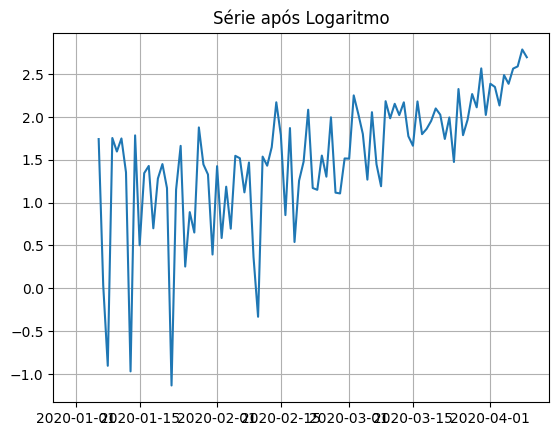

In [8]:
##### Aplicar log
serie_log = np.log(serie_exp)

plt.plot(serie_log)
plt.title("Série após Logaritmo")
plt.grid(True)
plt.show()

### 3. 🧪 **Box-Cox Transformation**

Transforma a série para aproximar normalidade e estacionaridade.
É parametrizada e flexível:

$y'_t = \frac{y_t^\lambda - 1}{\lambda}$

In [9]:
from scipy.stats import boxcox

# Box-Cox exige que todos os valores sejam > 0
serie_bc, lambda_bc = boxcox(serie_exp)

plt.plot(t, serie_bc)
plt.title(f"Série após Box-Cox (lambda = {lambda_bc:.2f})")
plt.grid(True)
plt.show()

ValueError: Data must be positive.

##### ▶


/tmp/ipython-input-1463544762.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


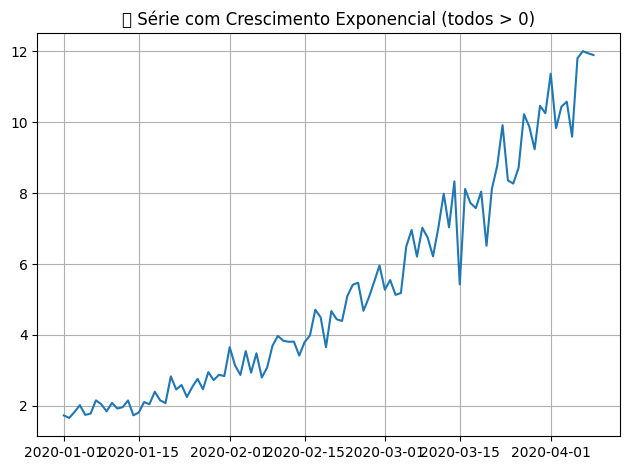

In [10]:
# Série exponencial com todos os valores positivos
np.random.seed(42)
serie_exp = pd.Series(
    np.exp(np.linspace(0.5, 2.5, 100)) * (1 + np.random.normal(0, 0.1, 100)),  # ruído multiplicativo leve
    index=t
)

# Plotar
plt.plot(serie_exp)
plt.title("📈 Série com Crescimento Exponencial (todos > 0)")
plt.grid(True)
plt.tight_layout()
plt.show()


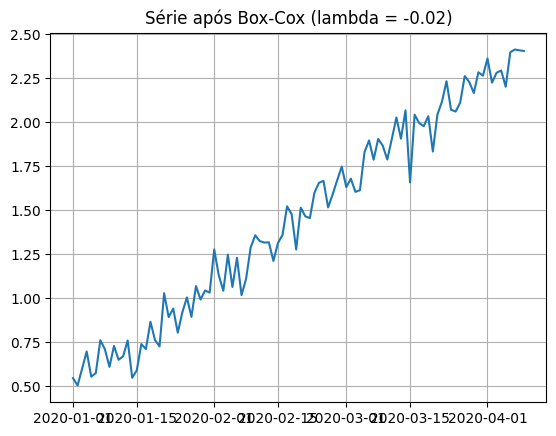

In [17]:
from scipy.stats import boxcox

# Box-Cox exige que todos os valores sejam > 0
serie_bc, lambda_bc = boxcox(serie_exp)

plt.plot(t, serie_bc)
plt.title(f"Série após Box-Cox (lambda = {lambda_bc:.2f})")
plt.grid(True)
plt.show()

In [14]:
testar_estacionaridade(serie_bc)

🔎 Teste de Dickey-Fuller (ADF):
  → p-valor ADF: 0.9613
  ❌ Série não estacionária (ADF)

🔎 Teste de KPSS:
  → p-valor KPSS: 0.0100
  ❌ Série não estacionária (KPSS)


/tmp/ipython-input-1092486966.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado_kpss = kpss(serie, regression='c')


2020-01-01    0.544938
2020-01-02    0.503263
2020-01-03    0.598884
2020-01-04    0.696572
2020-01-05    0.553463
Freq: D, dtype: float64


/tmp/ipython-input-3831138685.py:12: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


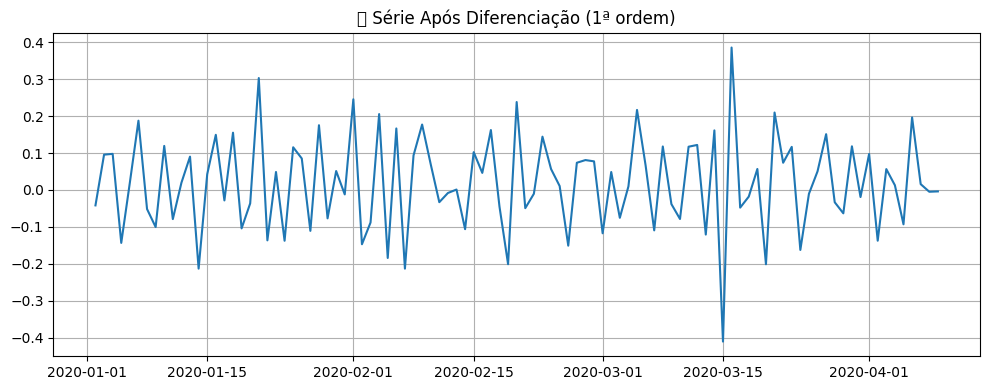

🔎 Teste de Dickey-Fuller (ADF):
  → p-valor ADF: 0.0000
  ✅ Série estacionária (ADF)

🔎 Teste de KPSS:
  → p-valor KPSS: 0.1000
  ✅ Série estacionária (KPSS)


/tmp/ipython-input-1092486966.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado_kpss = kpss(serie, regression='c')


In [26]:
#transformando rapidin pra um pandas df
serie_bc_pd = pd.Series(serie_bc, index=pd.to_datetime(t))
print(serie_temporal.head())

# Diferenciação
serie_bc_diff = serie_bc_pd.diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(serie_bc_diff)
plt.title("📉 Série Após Diferenciação (1ª ordem)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Testar estacionaridade novamente
testar_estacionaridade(serie_diff)


### ✅ Resumo: Quando usar o quê?

| Técnica             | Quando usar?                              |
|---------------------|--------------------------------------------|
| **Diferenciação**   | Para remover tendência                     |
| **Logaritmo**       | Para estabilizar variância (crescimento)   |
| **Box-Cox**         | Para estabilizar variância e normalizar    |


## 5. **Análise Exploratória de Séries Temporais**

Antes de ajustar qualquer modelo (ARIMA, por exemplo), é fundamental fazer uma análise exploratória da série temporal para:

- Identificar padrões residuais
- Visualizar a distribuição
- Verificar constância de média/variância ao longo do tempo
- Estimar autocorrelações (FAC e FACP)

### 5.1. Gráficos Básicos: Linha, Histograma, Média e Variância Móveis

/tmp/ipython-input-439136545.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


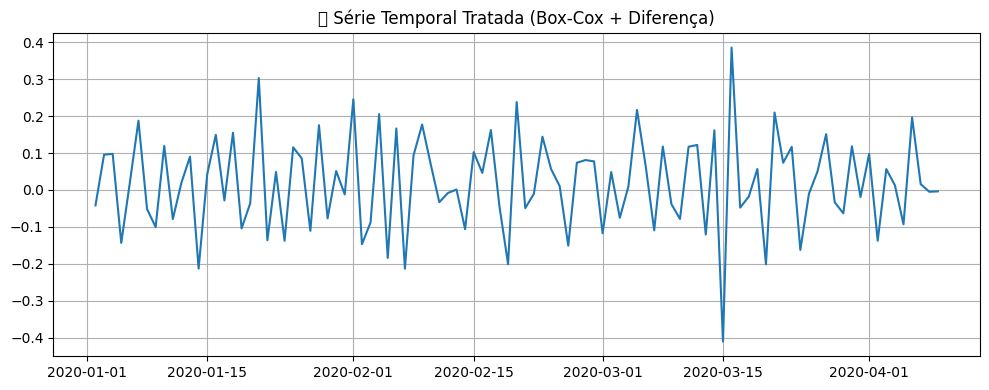

/tmp/ipython-input-439136545.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


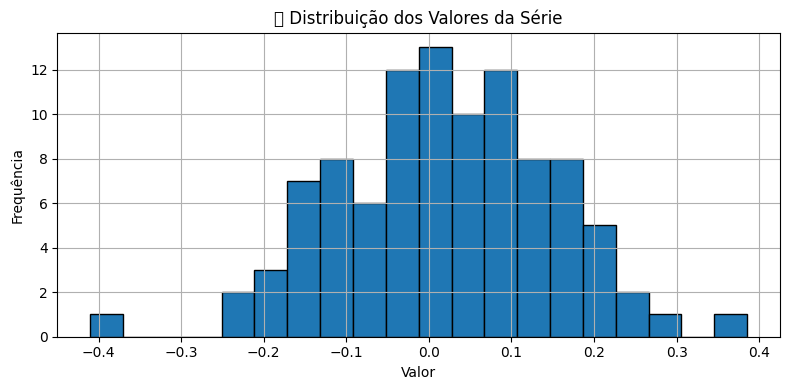

/tmp/ipython-input-439136545.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


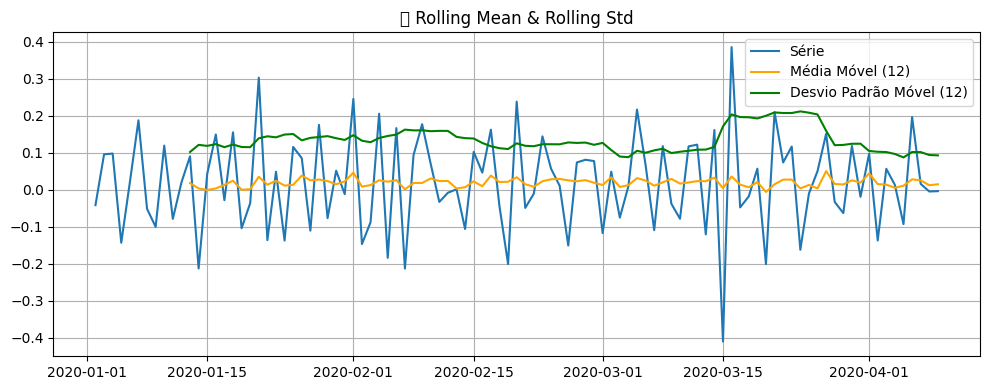

In [27]:
import matplotlib.pyplot as plt

# Gráfico de linha
plt.figure(figsize=(10, 4))
plt.plot(serie_bc_diff)
plt.title("📈 Série Temporal Tratada (Box-Cox + Diferença)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Histograma
plt.figure(figsize=(8, 4))
plt.hist(serie_bc_diff, bins=20, edgecolor='black')
plt.title("📊 Distribuição dos Valores da Série")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.grid(True)
plt.tight_layout()
plt.show()

# Média e variância móveis
rolling_mean = serie_bc_diff.rolling(window=12).mean()
rolling_std = serie_bc_diff.rolling(window=12).std()

plt.figure(figsize=(10, 4))
plt.plot(serie_bc_diff, label='Série')
plt.plot(rolling_mean, label='Média Móvel (12)', color='orange')
plt.plot(rolling_std, label='Desvio Padrão Móvel (12)', color='green')
plt.legend()
plt.title("📊 Rolling Mean & Rolling Std")
plt.grid(True)
plt.tight_layout()
plt.show()


> **Dicas de Interpretação:**

- **Se a média e variância móveis são aproximadamente constantes**, a série tende a ser estacionária.
- **Assimetria no histograma** pode indicar necessidade de transformação adicional.

### 5.2. FAC - Função de Autocorrelação

/tmp/ipython-input-3046376361.py:6: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 800x400 with 0 Axes>

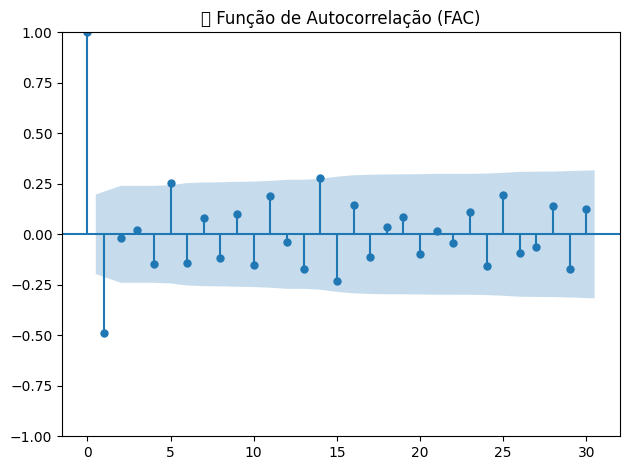

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8, 4))
plot_acf(serie_bc_diff, lags=30)
plt.title("🔁 Função de Autocorrelação (FAC)")
plt.tight_layout()
plt.show()


### 5.3. FACP - Função de Autocorrelação Parcial

/tmp/ipython-input-2757421226.py:6: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 800x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


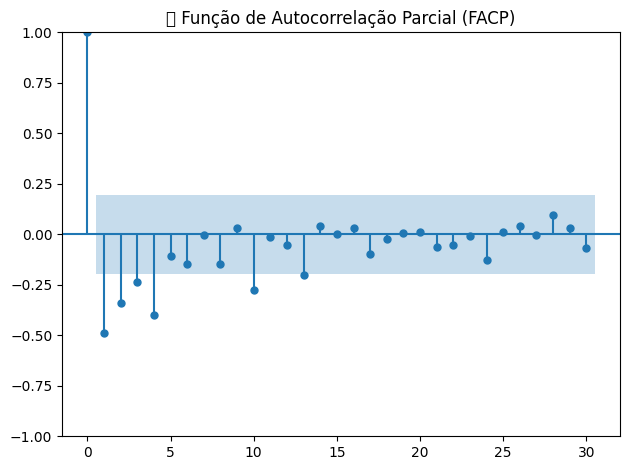

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(8, 4))
plot_pacf(serie_bc_diff, lags=30, method='ywm')
plt.title("🔁 Função de Autocorrelação Parcial (FACP)")
plt.tight_layout()
plt.show()


### 📖 Interpretação dos Resultados da FAC e FACP:

| Padrão                      | Indicação                                 |
|----------------------------|-------------------------------------------|
| FAC decai lentamente       | Pode indicar componente AR (AutoRegressivo) |
| FACP corta bruscamente     | Pode indicar ordem p de um AR(p)          |
| FAC corta bruscamente      | Pode indicar ordem q de um MA(q)          |
| Ambos decaem lentamente    | Pode indicar necessidade de mais diferenciações |

## 6. **Modelos Clássicos de Séries Temporais**

### 🔁 **Modelo AR (Auto-Regressivo)**



#### 🧠 Intuição:

O valor da série em um tempo $t$ depende **linearmente** dos valores passados.

#### 📐 Fórmula geral do modelo AR(p):

$$
y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \epsilon_t
$$

* $\phi_i$: coeficientes de autoregressão
* $\epsilon_t$: ruído branco (média zero, variância constante)

#### 🧮 Exemplo com AR(1):

Considere a seguinte série:

```python
serie_exemplo = [2, 4, 5, 7, 8, 9, 10, 12, 13, 14]
```

Suponha um modelo AR(1) com coeficiente $\phi = 0.8$, e ruído médio zero.
Vamos estimar $y_t$ com base apenas no valor anterior:

$$
\hat{y}_t = 0.8 \cdot y_{t-1}
$$

Calculando os valores previstos para $t = 1$ a $9$:

| t | $y_{t-1}$ | $\hat{y}_t$ = 0.8 × $y_{t-1}$ | $y_t$ real | Erro $e_t$ |
| - | --------- | ----------------------------- | ---------- | ---------- |
| 1 | 2         | —                             | 4          | —          |
| 2 | 4         | 3.2                           | 5          | 1.8        |
| 3 | 5         | 4.0                           | 7          | 3.0        |
| 4 | 7         | 5.6                           | 8          | 2.4        |
| 5 | 8         | 6.4                           | 9          | 2.6        |
| 6 | 9         | 7.2                           | 10         | 2.8        |
| 7 | 10        | 8.0                           | 12         | 4.0        |
| 8 | 12        | 9.6                           | 13         | 3.4        |
| 9 | 13        | 10.4                          | 14         | 3.6        |

---

### 🔄 **Modelo MA (Média Móvel)**


#### 🧠 Intuição:

O valor da série em $t$ é função dos **erros passados** (ruídos).

#### 📐 Fórmula do modelo MA(q):

$$
y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}
$$

* $\mu$: média da série
* $\theta_i$: coeficientes do modelo
* $\epsilon$: erro (ruído)

#### 🧮 Exemplo com MA(1):

Vamos usar a mesma série e simular erros (supostos conhecidos):

```python
serie_exemplo = [2, 4, 5, 7, 8, 9, 10, 12, 13, 14]
```

Vamos assumir:

* Média $\mu = 0$
* $\theta_1 = 0.5$
* Ruídos simulados: $\epsilon = [0, 1, -1, 0.5, 0.2, -0.3, 0.4, -0.1, 0.3, -0.2]$

Então:

$$
\hat{y}_t = \mu + \epsilon_t + 0.5 \cdot \epsilon_{t-1}
$$

Exemplo para alguns valores:

| t | $\epsilon_{t-1}$ | $\epsilon_t$ | $\hat{y}_t$         |
| - | ---------------- | ------------ | ------------------- |
| 1 | 0                | 1            | 1 + 0.5 × 0 = 1     |
| 2 | 1                | -1           | -1 + 0.5 × 1 = -0.5 |
| 3 | -1               | 0.5          | 0.5 - 0.5 = 0       |
| 4 | 0.5              | 0.2          | 0.2 + 0.25 = 0.45   |

---



### 🔀 **Modelo ARMA(p, q)**



#### 🧠 Intuição:

Combina componentes autoregressivas (AR) com média móvel (MA).

#### 📐 Fórmula do modelo ARMA(p, q):

$$
y_t = \phi_1 y_{t-1} + \dots + \phi_p y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q}
$$

#### 🧮 Exemplo com ARMA(1,1):

Suponha:

* $\phi = 0.7$, $\theta = 0.6$
* $\epsilon = [0, 1, -0.5, 0.3, -0.1, 0.2, -0.2, 0.4, -0.3, 0.1]$

$$
\hat{y}_t = 0.7 y_{t-1} + \epsilon_t + 0.6 \epsilon_{t-1}
$$

Cálculo para $t = 2$:

* $y_{1} = 4$
* $\epsilon_2 = -0.5$, $\epsilon_1 = 1$

$$
\hat{y}_2 = 0.7 \cdot 4 + (-0.5) + 0.6 \cdot 1 = 2.8 - 0.5 + 0.6 = 2.9
$$

---

### 🔁 **Modelo ARIMA(p, d, q)**


#### 🧠 Intuição:

É um ARMA aplicado **após** diferenciar a série $d$ vezes, ou seja:

* **AR(p)**: memória dos valores passados
* **I(d)**: número de diferenciações (diferença da série original para torná-la estacionária)
* **MA(q)**: memória dos erros passados

#### 📐 Fórmula geral:

Seja $y_t$ a série original. Após $d$ diferenciações:

$$
\Delta^d y_t = \phi_1 \Delta^d y_{t-1} + \dots + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots
$$

---



### ✅ Resumo Final

| Modelo         | Fórmula                                    | Usa valores passados? | Usa erros passados? |
| -------------- | ------------------------------------------ | --------------------- | ------------------- |
| AR(p)          | $y_t = \sum \phi_i y_{t-i} + \epsilon_t$   | ✅                     | ❌                   |
| MA(q)          | $y_t = \mu + \sum \theta_i \epsilon_{t-i}$ | ❌                     | ✅                   |
| ARMA(p, q)     | Combina ambos                              | ✅                     | ✅                   |
| ARIMA(p, d, q) | ARMA com diferenciação                     | ✅                     | ✅                   |

## 7. **Construção do Modelo ARIMA**

* **AR (Auto-Regressivo)**: relação com os próprios valores passados (p)
* **I (Integrated)**: número de diferenciações necessárias para estacionarizar a série (d)
* **MA (Média Móvel)**: relação com os erros passados (q)

### ✅ **Qual série usar no ARIMA?**
Nós já:

* aplicamos **Box-Cox** (transformação de variância);
* fizemos **diferenciação** (para remover tendência);
* validamos **estacionaridade com ADF/KPSS**;
* e plotamos FAC/FACP.

Ou seja, temos ainda:

* 📈 `serie_nao_estacionaria` → **entrada bruta**
* 🔁 `serie_bc_diff` → **já tratada e estacionarizada**

🟩 **No AutoARIMA usamos a `SERIE ORIGINAL`**.

> O AutoARIMA irá automaticamente testar combinações de (p, d, q) e aplicar as diferenciações necessárias se você passar a série original.


### ⚙️ **AutoARIMA com `pmdarima`**

In [ ]:
from pmdarima.arima import auto_arima

# Rodando AutoARIMA
modelo_auto = auto_arima(
    serie_nao_estacionaria,
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

print(modelo_auto.summary())

### 📊 **FAC e FACP: como usar para sugerir (p, q)**


* **FAC (gráfico 1)**: decaimento lento → presença de autocorrelação → **indica MA**
* **FACP (gráfico 2)**: corte brusco no lag 1 → forte autocorrelação parcial apenas no primeiro lag → **indica AR(1)**

#### 🔎 **Interpretando nossa FAC e FACP**:


* **p = 1**, porque FACP corta no lag 1
* **q = 3 ou 4**, porque FAC decai mais lentamente até esse ponto
* **d = 1**, pois você já diferenciou

### ⚒️ **Ajustando manualmente um ARIMA com `statsmodels`**


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Usando serie_nao_estacionaria (sem diferenciação manual)
modelo = ARIMA(serie_nao_estacionaria, order=(1, 1, 3))  # (p=1, d=1, q=3)
resultado = modelo.fit()

print(resultado.summary())

### 📈 **Plotando previsão**

In [ ]:
# Previsão dos próximos 10 períodos
forecast = resultado.forecast(steps=10)

plt.figure(figsize=(10,5))
plt.plot(serie_nao_estacionaria, label='Série Original')
plt.plot(forecast.index, forecast, label='Previsão', linestyle='--')
plt.legend()
plt.title("Previsão com ARIMA(1,1,3)")
plt.grid(True)
plt.show()

## 8. **Validação e Previsão em Séries Temporais**


### 🎯 **Objetivo**

Avaliar se o modelo ARIMA realmente é capaz de prever com precisão valores futuros — e evitar overfitting.


### 🧪 **1. Divisão Treino/Teste: Walk-Forward Validation**


Ao contrário de datasets comuns, **séries temporais não podem ser embaralhadas**, pois a ordem do tempo é fundamental.

📌 **Walk-forward** simula previsões passo a passo, como no mundo real:

1. Treina o modelo até o tempo `t`
2. Faz a previsão para `t+1`
3. Acrescenta `t+1` aos dados e repete


#### 🛠️ Como funciona essa brincadeira em Python (com ARIMA)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Série original
serie = serie_nao_estacionaria.copy()

# Definindo proporção treino/teste (ex: 80% treino, 20% teste)
train_size = int(len(serie) * 0.8)
train, test = serie.iloc[:train_size], serie.iloc[train_size:]

# Armazenar previsões
history = list(train)
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,3))  # ajuste conforme seu melhor modelo
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test.iloc[t])  # walk-forward (incrementando a cada passo)

#### 📉 Avaliação do Modelo


In [ ]:
# Cálculo do erro
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"RMSE: {rmse:.4f}")

#### 📊 Visualização


In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label='Valores Reais')
plt.plot(test.index, predictions, label='Previsões', linestyle='--')
plt.title("Validação Walk-Forward com ARIMA")
plt.legend()
plt.grid(True)
plt.show()

### ⏳ **2. Forecasting para o Futuro**


Agora que o modelo foi validado, vamos usá-lo para prever valores futuros.

#### 🔮 Previsão futura com ARIMA


In [ ]:
# Ajusta o modelo na série completa
modelo_final = ARIMA(serie, order=(1,1,3)).fit()

# Previsão para os próximos 12 períodos
forecast_futuro = modelo_final.forecast(steps=12)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(serie, label="Histórico")
plt.plot(forecast_futuro.index, forecast_futuro, label="Previsão Futuro", linestyle='--')
plt.title("Forecast Futuro com ARIMA")
plt.legend()
plt.grid(True)
plt.show()